# Fundamentos de Aprendizaje Automático y Reconocimiento de Patrones

# Práctico 1

In [2]:
# Importar biblotecas a utilizar
import numpy as np
from matplotlib import pyplot as plt
from fuaa_utils import validar_resultado
import math

# El inline sirve para que las figuras se muestren dentro del notebook
%matplotlib inline

# Agregar para que el notebook vea los cambios realizados en los modulos que
# utiliza.
%reload_ext autoreload
%autoreload 2

## Objetivos

En este práctico se profundizará en dos temas vistos en el teórico: el **modelo del perceptrón** y la **viabilidad del aprendizaje**. Los objetivos del práctico son:   

- Familiarizarse con el notebook Jupyter
    - Escribir código utilizando bibiliotecas de Python
    - Escribir ecuaciones utilizando el formato Markdown. *Nota:* esta [tabla de comandos Tex](https://www.math.brown.edu/~jhs/ReferenceCards/TeXRefCard.v1.5.pdf) puede ser útil para escribir las ecuaciones.
- Adquirir la intuición de que la superficie de decisión determinada por el **modelo del perceptrón** es un hiperplano. Se verá que en el caso de puntos que viven en el plano la superficie de decisión es una recta. 
-  Implementar el **algoritmo del perceptrón**. 
    -  Se verá que es posible utilizar al *perceptrón* para separar un conjunto de datos linealmente separable. 
    - Utilizando el **perceptrón** como caso particular de **modelo de aprendizaje**, se mostrará que la solución $g$ devuelta por el algoritmo de aprendizaje en general no coincide con la función $f$ que relaciona los puntos de entrada con las etiquetas. 
- Simular experimentos que permitan evaluar el alcance de la **Desigualdad de Hoeffding**   

*** 

## Lista de ejercicios
[El perceptrón](#ElPerceptron)
>[Ejercicio 1](#Ejercicio1): regla de actualización de pesos      
[Ejercicio 2](#Ejercicio2): frontera de decisión  
[Ejercicio 3](#Ejercicio3): implementación del perceptrón  

[Desigualdad de Hoeffding](#DesigualdadHoeffding)  
>[Ejercicio 4](#Ejercicio4): bolillas rojas y verdes, evaluando una hipótesis  
[Ejercicio 5](#Ejercicio5): monedas al aire, eligiendo una hipótesis 

# El Perceptrón
<a id="ElPerceptron"></a>

Dado un punto  $\mathbf{x} \in R^d$ , el *modelo de perceptrón* le asigna la clase +1 o -1 de acuerdo a la siguiente expresión

$$
h(\mathbf{x}) = signo \left( \sum_{i=1}^d w_i x_i + b \right). 
$$

A los efectos de hacer la notación más compacta, es habitual escribir dicha expresión en *coordenadas homogéneas*. Llamando $w_0$ a $b$ y agregando una coordenada con valor constante 1 a  $\mathbf{x}$, es decir $\mathbf{x} = [1, x_1, \ldots , x_d] $ la expresión anterior queda

$$
h(\mathbf{x}) = signo \left( \sum_{i=0}^d w_i x_i \right) = signo \left(\mathbf{w}^T \mathbf{x} \right).
$$  

Para encontrar los parámetros del modelo es necesario contar con un conjunto de puntos de entrenamiento $\{\mathbf{x}_1, \ldots, \mathbf{x}_N\}$ con sus correspondientes etiquetas $\{y_1, \ldots, y_N\}$. El *algoritmo del perceptrón* recorre en forma iterativa el conjunto de puntos de entrenamiento y en cada paso $t$ se fija si el modelo clasifica correctamente al punto $\mathbf{x}(t)$. En caso afirmativo no hace nada y en caso negativo actualiza los pesos de acuerdo a la siguiente regla:

$$
\mathbf{w}(t+1)=\mathbf{w}(t)+y(t)\mathbf{x}(t)
$$

siendo $y(t)$ la etiqueta correspondiente al punto $\mathbf{x}(t).$

## Ejercicio 1
<a id="Ejercicio1"></a>

Cada vez que se actualizan los pesos del perceptrón 

$$
\mathbf{w}(t+1)=\mathbf{w}(t)+y(t)\mathbf{x}(t)
$$

la frontera de decisión determinada por los pesos se mueve a una dirección tendiente a clasificar la muestra actual correctamente. Asumiendo que la muestra $\mathbf{x}(t)$ es mal clasificada en el paso actual      

**a)** Mostrar que $y(t) \mathbf{w}^T(t) \mathbf{x}(t)<0.$

**RESPUESTA:**  
Al estar la muestra mal clasificada, significa que sign($W^Tx(t)$) $\neq$ sign(y(t)) 

**b)** Mostrar que $y(t)\mathbf{w}^T(t+1)\mathbf{x}(t) > y(t)\mathbf{w}^T(t)\mathbf{x}(t).$

**RESPUESTA:**

$y(t)(\mathbf{w}(t)+y(t)\mathbf{x}(t))^T\mathbf{x}(t) > y(t)\mathbf{w}^T(t)\mathbf{x}(t).$ => $y(t)(w^T(t).x(t)+y(t).x^T(t).x(t)) > y(t)\mathbf{w}^T(t)\mathbf{x}(t)$ => (como y(t)*y(t) = 1), $y(t).w^T(t).x(t) + x^T(t).x(t) > y(t)\mathbf{w}^T(t)\mathbf{x}(t)$.

**c)** Argumentar que la actualización de $\mathbf{w}(t)$ a $\mathbf{w}(t+1)$ es un movimiento en la dirección correcta en cuanto a clasificar a $\mathbf{x}(t)$ correctamente se refiere.

**RESPUESTA:**   

...

## Ejercicio 2
<a id="Ejercicio2"></a>

Se considera el perceptrón en dos dimensiones: $h(\mathbf{x}) = signo(\mathbf{w}^T\mathbf{x})$ donde $\mathbf{w}=[w_0, w_1, w_2]^T$ y $\mathbf{x}=[1, x_1, x_2]^T$. Técnicamente $\mathbf{x}$ tiene tres coordenadas, pero al perceptrón en este caso se lo llama *bi-dimensional* porque la primera coordenada tiene un valor constante uno.    

**a)** Mostrar que las regiones del plano donde $h(\mathbf{x})= +1$ y $h(\mathbf{x})= -1$ están separadas por una recta. Si se expresa dicha recta mediante la ecuación $x_2 = mx_1 + n$, escribir la pendiente $m$ y la intersección $n$ en función de $w_0$, $w_1$, $w_2$    

**RESPUESTA:**  

m= -w1/w2 , n= -w0/w2

**b)** Graficar la frontera de decisión para los casos $\mathbf{w}=[1,2,3]^T$ y $\mathbf{w}=-[1,2,3]^T$ 

En dimensiones mayores a dos, las regiones +1 y -1 están separadas por un hiperplano, la generalización de una recta.

(3, 1)
(3, 1)
+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 El resultado es correcto. Continuar.
+-------------------------------------------------------------------------+


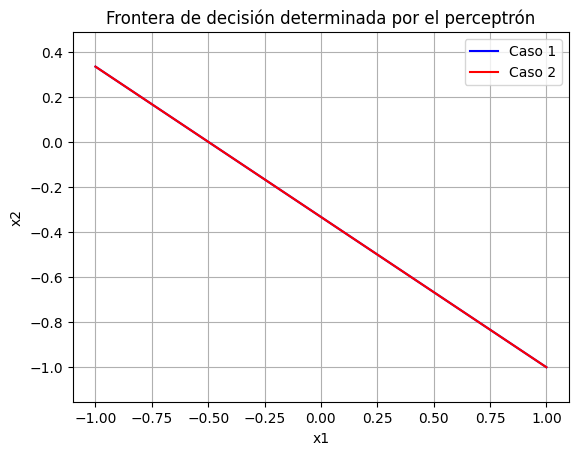

In [11]:
# Se define el espacio como la región comprendida en [-1,1] x [-1,+1]
x1_min = -1
x1_max = 1
x2_min = -1
x2_max = 1

x1 = np.linspace(x1_min, x1_max)

###################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ####
###################################################

# Se definen los pesos
w1 = np.array([1,2,3]).reshape(-1,1)
w2 = np.array([-1,-2,-3]).reshape(-1,1)
print(w1.shape)
print(w2.shape)

# Se encuentran las ordenadas para los pesos anteriormente definidos.

# Coordenadas x2 de acuerdo al modelo 1
x2_w1 = -w1[1]/w1[2]*x1 - w1[0]/w1[2]

# Coordenadas x2 de acuerdo al modelo 2
x2_w2 = -w2[1]/w2[2]*x1 - w2[0]/w2[2]

###################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ####
###################################################

# Validar resultado.
validar_resultado('p01e02b', x2_w1, x2_w2)

# Graficar fronteras de decisión.
plt.figure()
plt.plot(x1, x2_w1,'b')
plt.plot(x1, x2_w2,'r')
plt.legend(['Caso 1', 'Caso 2'])
plt.xlabel('x1', fontsize=10)
plt.ylabel('x2', fontsize=10)
plt.title('Frontera de decisión determinada por el perceptrón')
plt.axis('equal')
plt.grid()

## Ejercicio 3 
<a id="Ejercicio3"></a>

En este problema se explorará el comportamiento del perceptrón utilizando conjuntos de datos de entrenamiento de diferentes tamaño y dimensiones.  

### Generar conjunto de entrenamiento 

Completar el código de la función `generar_conjunto_entrenamiento()`. Dentro de la misma se deberá eligir aleatoriamente una recta del plano como función objetivo $f$. La recta elegida divide al plano en dos regiones, a los puntos pertenecientes a una de ellas se les asignará la etiqueta +1 y a los pertenecientes a la otra se le asignará -1. Se asumirá que el espacio $\mathcal{X} = [-1,1] \times [-1,1]$. Los puntos $\mathbf{x}_n$ del conjunto de entrenamiento serán elegidos de manera aleatoria y sus etiquetas $y_n$ serán asignadas evaluando la función objetivo para cada $\mathbf{x}_n$. De esta forma se generará un conjunto de entrenamiento de tamaño $N=20$. 

In [4]:
def generar_conjunto_entrenamiento(cantidad_muestras, d=2, semilla=None):
    """ Esta función genera un conjunto de entrenamiento de tamaño cantidad_muestras
    Entrada:
        cantidad_muestras: cantidad de muestras que se devuelven
        d: dimensión en la que viven las muestras generadas
        semilla: valor que se le asigna al método random.seed()
    Salida:
        w_rand: vector de tamaño d+1 que contiene los parámetros 
                de la función objetivo elegida aleatoriamente
        X: matriz de tamaño (cantidad_muestras x (d+1)) que contiene las 
           muestras de entrenamiento generadas
        y: vector de tamaño cantidad_muestras que contine las etiquetas de las 
           muestras generadas
    """

    # El espacio se restringe a la región [-1, 1] x [-1, 1]
    x_min = -1
    x_max = 1

    if semilla is not None:
        np.random.seed(semilla)

    #######################################################
    ######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################

    # Se elige aleatoriamente una recta del plano como función objetivo f

    w_rand = np.random.rand(d+1)
  
    
    # Se elige aleatoriamente N puntos pertenecientes a la región de interés. 
    
    Rand = np.random.uniform(x_min, x_max, size=(cantidad_muestras, d))

    # print(Rand)
    # Se agregan los unos correspondientes a las coordenadas homogéneas.
    
    unos = np.ones(cantidad_muestras).reshape(-1,1)
    
    
    X = np.hstack((unos,Rand))
    
    # Se generan las salidas utilizando el modelo del perceptrón.

    y = np.sign(np.dot(X,w_rand))
  
    #######################################################
    ######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################

    return w_rand, X, y


N = 20
w, X, y = generar_conjunto_entrenamiento(N, semilla=42)

validar_resultado('p01e03', w, X, y)

+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 El resultado es correcto. Continuar.
+-------------------------------------------------------------------------+


### Visualizar conjunto de entrenamiento 

Verificar el correcto funcionamiento graficando las muestras $\{ (x_n, y_n) \}$ junto con la función objetivo $f$ indicando claramente a que clase pertenece cada una de las muestras. 

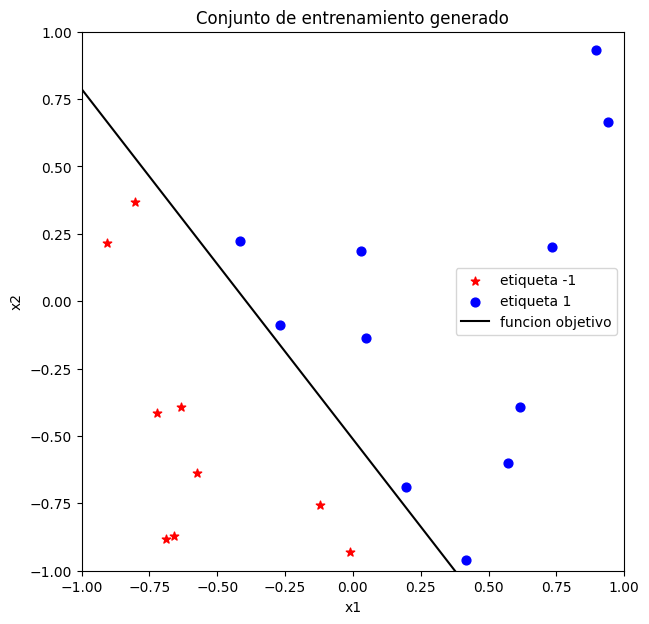

In [5]:
def graficar_entrenamiento_perceptron(X, y, w_f, w_g=None):
    '''
    Entrada: 
        X: matriz de tamaño Nx3 que contiene el conjunto de puntos de 
           entrenamiento expresados en coordenadas homogeneas. La primera 
           coordenada de cada punto es uno.
        y: etiquetas asignadas a los puntos.
        w_f: parámetros de la función objetivo.
        w_g: parámetros encontrados por el perceptrón.
    '''
    plt.figure(figsize=(7, 7))

    # Se grafican los puntos sorteados
    plt.scatter(X[y == -1, 1],
                X[y == -1, 2],
                s=40,
                color='r',
                marker='*',
                label='etiqueta -1')
    plt.scatter(X[y == 1, 1],
                X[y == 1, 2],
                s=40,
                color='b',
                marker='o',
                label='etiqueta 1')

    # Se grafica la superficie de decisión objetivo
    x1 = np.linspace(-1, 1)
    if w_f[2] != 0:
        x2_f = -w_f[1] / w_f[2] * x1 + -w_f[0] / w_f[2]
        plt.plot(x1, x2_f, label='funcion objetivo', c='k')
    else:
        plt.axvline(x=-w_f[0] / w_f[1], c='k')

    if w_g is not None:
        if w_g[2] != 0:
            # Se grafica la superficie de decisión encontrada
            x2_g = -w_g[1] / w_g[2] * x1 + -w_g[0] / w_g[2]
            plt.plot(x1, x2_g, label='funcion encontrada', c='g')
        else:
            plt.axvline(x=-w_g[0] / w_g[1], c='g')

    plt.legend()
    plt.xlim((-1, 1))
    plt.ylim((-1, 1))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Conjunto de entrenamiento generado')


graficar_entrenamiento_perceptron(X, y, w)

### Implementar el perceptrón
<a id="implementarPerceptron"></a>

Implementar el método `entrenar_perceptron()`.

In [6]:
def entrenar_perceptron(X, y, w_inicial=None, max_iter=500):
    """
    Entrada:
        X: matriz de (Nxd+1) que contiene las muestras de entrenamiento
        y: etiquetas asociadas a las muestras de entrenamiento
        max_iter: máxima cantidad de iteraciones que el algoritmo 
                  puede estar iterando
        w_inicial: inicialización de los pesos del perceptrón
        
    Salida:
        w: parámetros del modelos perceptrón   
        error: lista que contiene los errores cometidos en cada iteración
    """

    if w_inicial is None:
        # Se inicializan los pesos del perceptrón
        w = np.random.rand(X.shape[1])  # w = np.zeros(d+1)
    else:
        w = w_inicial

    #######################################################
    ######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################
    cont = 0
    error = []
   
    
    while (cont <= max_iter ) and (cont == 0 or cant_errores != 0):
        cant_errores = 0
        cont = cont + 1 #acutalizo cont
       
        for i,j in zip(X,y): #recorro X por filas, fila i de X y Y las etiquetas
            aux = np.sign(np.dot(i,w))
            if (aux != j):
                w = w + j*i
                cant_errores = cant_errores + 1
                
        error.append(cant_errores)
    
    
    #######################################################
    ######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################

    return w, error

### Entrenamiento base

Entrenar el perceptrón e indicar cuánto demora en converger.  Graficar las muestras $ \{ (x_n, y_n) \} $ junto con la función objetivo $f$ y la hipótesis encontrada $g$. ¿Qué tan cercanas son $f$ y $g$?

In [7]:
w_perceptron, error = entrenar_perceptron(X, y)
print('El perceptrón finalizó en la iteración %d' % len(error))

# El error de entrenamiento que con el w encontrado debería ser cero.
print('El error de entrenamiento es %f' % error[-1])

El perceptrón finalizó en la iteración 9
El error de entrenamiento es 0.000000


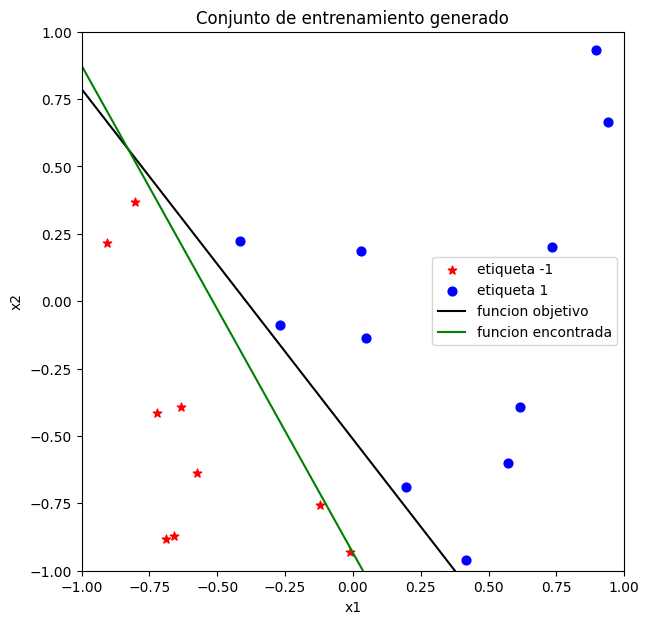

In [8]:
# Se grafica el resultado del entrenamiento.
graficar_entrenamiento_perceptron(X, y, w, w_perceptron)

#### Entrenamiento con otro conjunto de entrenamiento

Repetir el entrenamiento pero utilizando otro conjunto de tamaño $N=20$ generado aleatoriamente. Comparar los resultados con los obtenidos anteriormente.

In [10]:
#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################
N= 20
w, X, y = generar_conjunto_entrenamiento(N, 2)

w_perceptron, error = entrenar_perceptron(X, y)
print('El perceptrón finalizó en la iteración %d' % len(error2))
# El error de entrenamiento que con el w encontrado debería ser cero.
print('El error de entrenamiento es %f' % error2[-1])

graficar_entrenamiento_perceptron(X, y, w, w_perceptron)



#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

NameError: name 'error2' is not defined

### Entrenando con más muestras

Repetir nuevamente el entrenamiento pero ahora utilizando un conjunto de tamaño $N=100$ generado aleatoriamente. Comparar los resultados obtenidos con el del *entrenamiento base*.

El perceptrón finalizó en la iteración 2
El error de entrenamiento es 0.000000


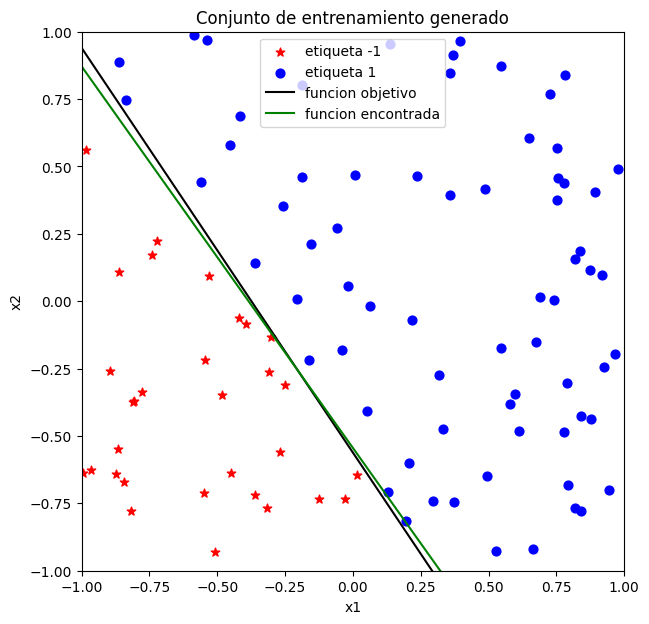

In [53]:
#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

N= 100
w, X, y = generar_conjunto_entrenamiento(N, 2)

w_perceptron, error = entrenar_perceptron(X, y)
print('El perceptrón finalizó en la iteración %d' % len(error2))
# El error de entrenamiento que con el w encontrado debería ser cero.
print('El error de entrenamiento es %f' % error2[-1])

graficar_entrenamiento_perceptron(X, y, w, w_perceptron)


#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

Repetir el entrenamiento utilizando un conjunto de tamaño $N=1000$ generado aleatoriamente. Comparar los resultados obtenidos con el *entrenamiento base*   

El perceptrón finalizó en la iteración 2
El error de entrenamiento es 0.000000


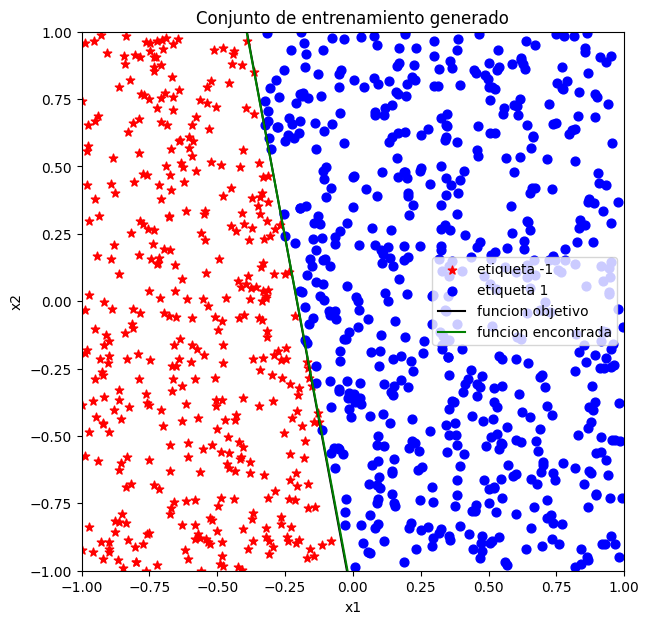

In [41]:
#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

N= 1000
w, X, y = generar_conjunto_entrenamiento(N, 2)

w_perceptron, error = entrenar_perceptron(X, y)
print('El perceptrón finalizó en la iteración %d' % len(error2))
# El error de entrenamiento que con el w encontrado debería ser cero.
print('El error de entrenamiento es %f' % error2[-1])

graficar_entrenamiento_perceptron(X, y, w, w_perceptron)


#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

**PREGUNTA:** En función de los experimentos realizados, comentar como varía la calidad de la estimación y el tiempo de procesamiento en función del número de muestras $N$.

**RESPUESTA:**

...

### Aumentando la dimensión de los datos

En caso de ser necesario, modificar `entrenar_perceptron` de forma tal que funcione con $\mathbf{x}_n \in \Bbb{R}^{10}$ además de $\mathbf{x}_n \in \Bbb{R}^{2}$. 

Generar un conjunto de entrenamiento linealmente separable de tamaño $N=1000$ con $\mathbf{x}_n \in \Bbb{R}^{10}$ y utilizarlo para entrenar el perceptrón. ¿Cuántas actualizaciones le lleva al algoritmo converger?     

In [52]:
#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################
N= 1000
w, X, y = generar_conjunto_entrenamiento(N, 10)
print(X)
w_perceptron, error = entrenar_perceptron(X, y)
print('El perceptrón finalizó en la iteración %d' % len(error2))
# El error de entrenamiento que con el w encontrado debería ser cero.
print('El error de entrenamiento es %f' % error2[-1])



#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

[[ 1.         -0.10020553  0.53780797 ... -0.75708846 -0.7173177
  -0.01635724]
 [ 1.         -0.741705    0.8053117  ...  0.69189845 -0.16103097
   0.9072963 ]
 [ 1.         -0.96855646  0.01250943 ...  0.26193553 -0.41021081
  -0.55592275]
 ...
 [ 1.          0.17243646 -0.03106831 ...  0.21049058 -0.6812393
   0.53288706]
 [ 1.          0.05280938 -0.12238697 ... -0.84260586  0.21564069
  -0.78959776]
 [ 1.          0.47692702  0.34959797 ... -0.15100058 -0.00912867
   0.72343186]]
El perceptrón finalizó en la iteración 2
El error de entrenamiento es 0.000000


# Desigualdad de Hoeffding
<a id="DesigualdadHoeffding"></a>

## Ejercicio 4 
<a id="Ejercicio5"></a>

Se considera un bolillero con bolillas rojas y verdes. La probabilidad de sacar una bolilla roja es $\mu=0.9$.

**a)** ¿Cuál es la probabilidad de que al sacar aleatoriamente 10 bolillas la fracción de bolillas rojas observada sea $\nu \leq 0.1$ ?    

Sugerencias: i) utilizar la distrbución binomial ii) la respuesta es un número muy pequeño. 

In [4]:
# Para esta parte puede ser útil np.math.factorial()
N = 10
mu = 0.9
Prob = 0  # Esta es la variable donde almacenar la probabilidad pedida.

#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################
#Tengo que sumar la prob que salga 1 sola roja mas la que salga 0 rojas
for i in range(0,2):
    print(i)
    k= N-i
    Prob = Prob + ((1-mu)**k) * ((mu)**i)*(math.factorial(N+i-1)/(math.factorial(i)*math.factorial(N-1)))
    print(Prob)


#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

validar_resultado('p01e04a', Prob)

0
9.999999999999978e-11
1
9.099999999999982e-09
+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 El resultado es correcto. Continuar.
+-------------------------------------------------------------------------+


**b)** Utilizar ahora la desigualdad de Hoeffding para acotar la probabilidad de que en una muestra de 10 bolillas la fracción de bolillas rojas observada sea $\nu \leq 0.1$. Comparar la respuesta con la de la parte anterior.

In [6]:
N = 10
mu = 0.9
Cota_Hoeffding = 0  # Esta es la variable donde almacenar la cota de Hoeffding.

#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################
d = abs(0.1-mu)
print(d)
Cota_Hoeffding = 2*np.exp(-2*(d)*(d)*N)
print(Cota_Hoeffding)

#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

validar_resultado('p01e04b', Cota_Hoeffding)

0.8
5.521545144074388e-06
+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 El resultado es correcto. Continuar.
+-------------------------------------------------------------------------+


**c)** Suponga ahora que se quiere garantizar que la distancia entre el valor estimado y el real no sea mayor a $\epsilon=0.05$ con una probabilidad de $0.97$. ¿Cuál es el mínimo número de bolillas $N$ que se necesitan sacar?

In [20]:
N = 0  # Esta es la variable donde almacenar el resultados pedido.

#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################
d = 0.05
Cota_Hoeffding = 2*np.exp(-2*(d)*(d)*N)
while (Cota_Hoeffding > 0.03):
        N = N + 1
        Cota_Hoeffding = 2*np.exp(-2*(d)*(d)*N)
     
print(N)
#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

validar_resultado('p01e04c', N)

840
+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 El resultado es correcto. Continuar.
+-------------------------------------------------------------------------+


## Ejercicio 5
<a id="Ejercicio6"></a>

Este ejercicio ilustra la diferencia entre utilizar una hipótesis fija $h$ y utilizar la hipótesis final $g$ seleccionada por un algoritmo de aprendizaje. Completar el código de la función `realizar_experimento_moneda(numero_monedas = 1000, lanzamientos_por_moneda = 10, semilla=None)` y luego simular un experimento en que se lancen 1000 monedas al aire. Cada una de las 1000 monedas se lanzará 10 veces al aire. Se guardará la cantidad de veces que la moneda sale cara en los siguientes casos:

* $c_0$ - la primera moneda lanzada
* $c_{rand}$ - una moneda elegida aleatoriamente
* $c_{min}$ - la moneda que salió cara menos veces

Sean $\nu_0$, $\nu_{rand}$ y $\nu_{min}$ la fracción de veces en que salió cara cada una de las monedas descritas anteriormente.

a) ¿Cuál es el valor de $\mu$ en cada uno de los casos?

In [3]:
def realizar_experimento_moneda(numero_monedas=1000,
                                lanzamientos_por_moneda=10,
                                semilla=None):
    """
    Entrada:
       numero_monedas: cantidad de monedas que son lanzadas al aire
       lanzamientos_por_moneda: cantidad de veces que es lanzada cada moneda
    Salida:
       v0: fracción de veces que la moneda 0 salió cara 
       v_rand: fracción de veces que salió cara una moneda elegida 
               aleatoriamente
       v_min: fracción de veces que salió cara la moneda que salió cara menos 
              veces
    """
    if semilla is not None:
        # se fija la semilla para que el experimento sea repetible
        np.random.seed(semilla)

    #######################################################
    ######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################
    experimento = np.random.choice([0,1], size=(numero_monedas,lanzamientos_por_moneda))

    v0 = np.sum(experimento[0, :]) / experimento.shape[1]
    v_min = v0
    for i in range(0,numero_monedas):
        suma = 0
        for j in range(0,lanzamientos_por_moneda):
            suma = suma + experimento[i,j]
        porcentaje = suma / lanzamientos_por_moneda
        if porcentaje < v_min :
            v_min = porcentaje

    h = np.random.randint(0,numero_monedas)
    v_rand = np.sum(experimento[h, :]) / experimento.shape[1]
    
    
    #######################################################
    ######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################

    return v0, v_rand, v_min


N = 10
v0, v_rand, v_min = realizar_experimento_moneda(lanzamientos_por_moneda=N,
                                                semilla=42)
print('mu_0 = %f, mu_{rand} = %f, mu_{min} = %f' % (v0, v_rand, v_min))

validar_resultado('p01e05a2', realizar_experimento_moneda)

mu_0 = 0.300000, mu_{rand} = 0.400000, mu_{min} = 0.000000
+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 El resultado es correcto. Continuar.
+-------------------------------------------------------------------------+


b) Repetir el experimento de la parte a) muchas veces (por ejemplo 100000 veces) y graficar el histograma de $\nu_0$, $\nu_{rand}$ y $\nu_{min}$. 

In [4]:
num_experimentos = 100000  #100000
# Matriz que guarda los resultados de los experimentos
V = np.zeros((num_experimentos, 3))
np.random.seed(42)

#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################
for i in range(0,num_experimentos):
    v0, v_rand, v_min = realizar_experimento_moneda(1000,10) 
    V[i,0] =v0
    V[i,1] = v_rand
    V[i,2] =v_min


#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

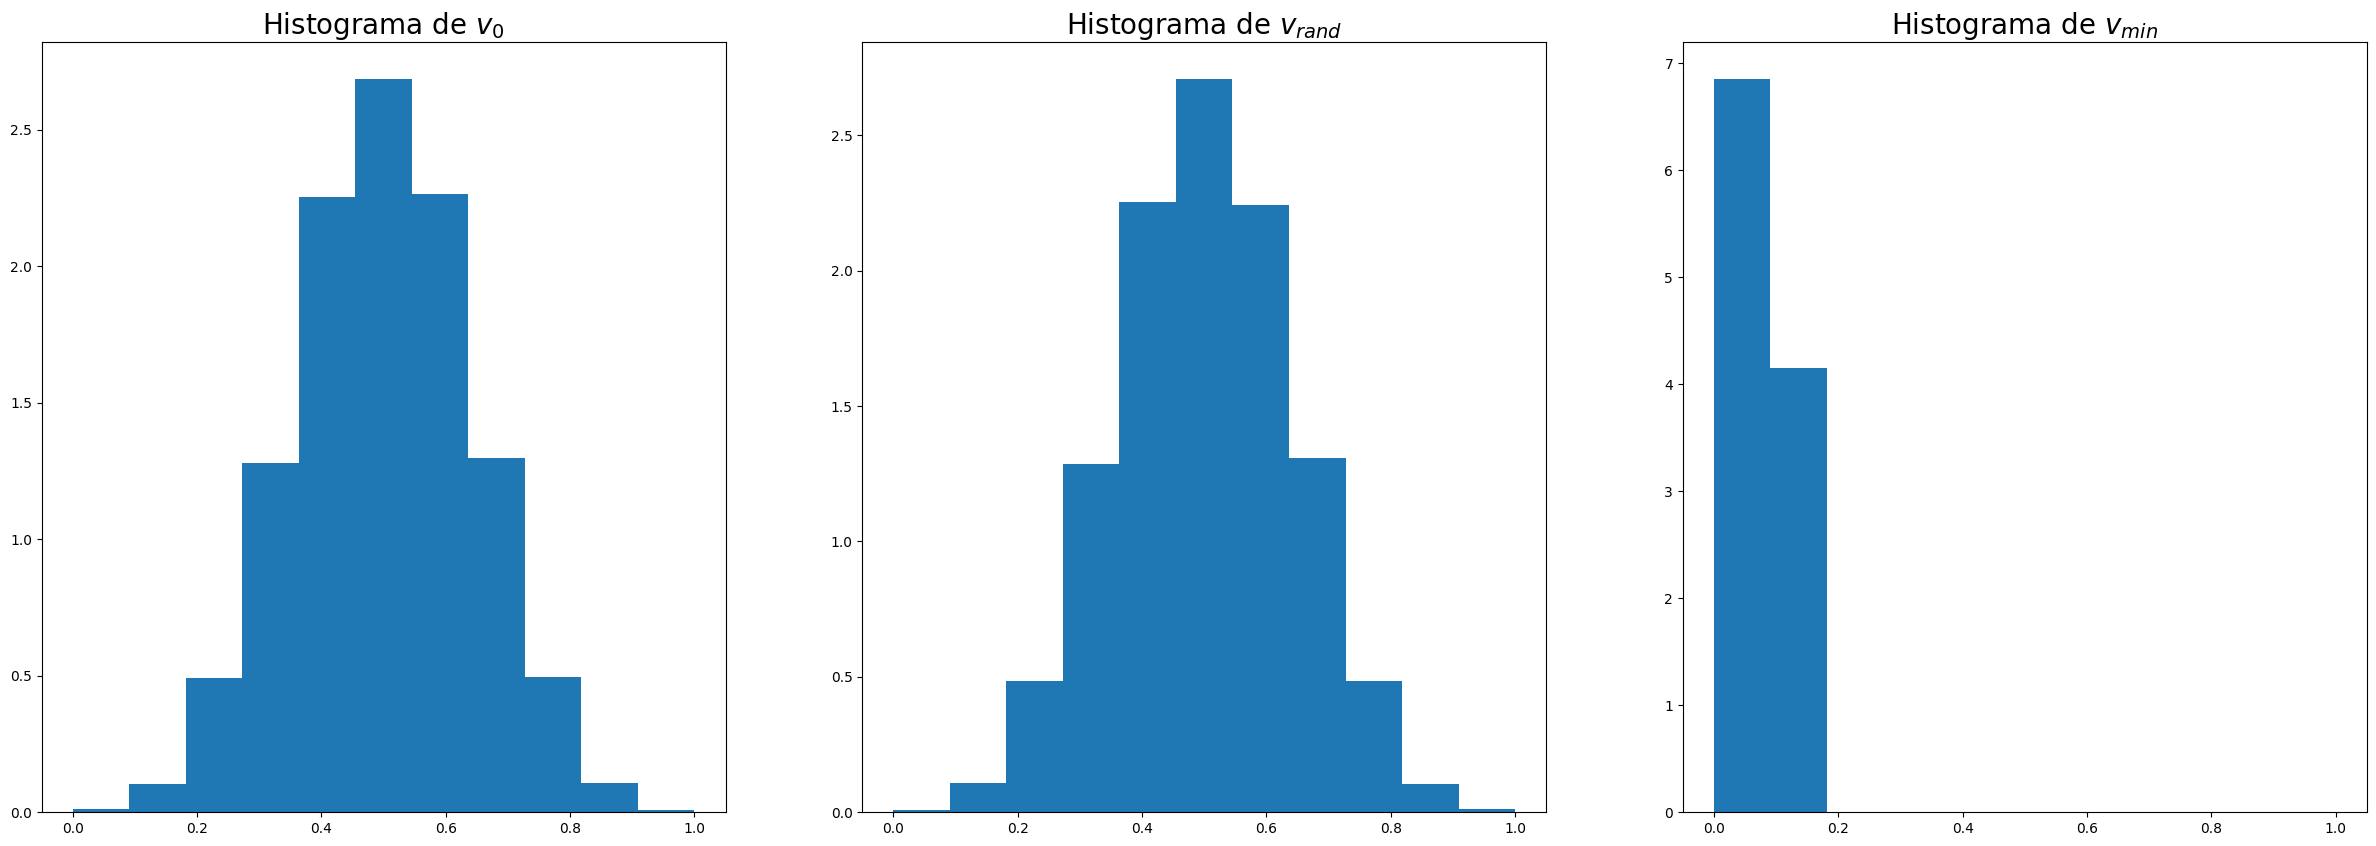

In [5]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
hist_V0, bins_V0, patches_V0 = plt.hist(V[:, 0],
                                        bins=11,
                                        range=(0, 1),
                                        density=True)
plt.title('Histograma de $v_0$', fontsize=20)
plt.subplot(1, 3, 2)
hist_Vrand, bins_Vrand, patches_Vrand = plt.hist(V[:, 1],
                                                 bins=11,
                                                 range=(0, 1),
                                                 density=True)
plt.title('Histograma de $v_{rand}$', fontsize=20)
plt.subplot(1, 3, 3)
hist_Vmin, bins_Vmin, patches_Vmin = plt.hist(V[:, 2],
                                              bins=11,
                                              range=(0, 1),
                                              density=True)
plt.title('Histograma de $v_{min}$', fontsize=20)
plt.show()

c) Usando b) graficar una estimación de $P(\vert \nu - \mu \vert > \epsilon )$ en función de $\epsilon$ junto con la cota de Hoeffding (en la misma figura)

In [ ]:
# Cota de Hoeffding
epsilons = np.arange(0., 1.05, 0.1)
cota_Hoeffding = 2.0 * np.exp(-2 * (epsilons**2) * N)
mu = 0.5


def calcular_probabilidad_empirica(V_j, mu, epsilons):
    '''
    Calcula la probabilidad P(|nu - mu| > epsilon ) para un experimento
    Entrada:
        V_j: vector de tamaño N que almacena los resultados de N experimentos para una de las monedas
        mu: valor de mu
        epsilons: valores de epsilon para los que se desea calcular la probabilidad
    Salida: 
        probabilidad_empirica: vector de tamaño igual al largo de epsilons que contiene las probabilidades
                             calculadas
    '''
    probabilidad_empirica = np.zeros(len(epsilons))
    for i, eps in enumerate(epsilons):

        #######################################################
        ######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
        #######################################################

        # Se suman los experimentos que distaron de mu más de epsilon por debajo

        # Se suman los experimentos que distaron de mu más de epsilon por arriba

        # Se calcula la probabilidad para el epsilon correspondiente

        #######################################################
        ######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
        #######################################################

    return probabilidad_empirica


resultado_empirico_moneda0 = calcular_probabilidad_empirica(
    V[:, 0], mu, epsilons)
resultado_empirico_moneda_aleatoria = calcular_probabilidad_empirica(
    V[:, 1], mu, epsilons)
resultado_empirico_moneda_menos_veces = calcular_probabilidad_empirica(
    V[:, 2], mu, epsilons)

plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
plt.plot(epsilons, cota_Hoeffding, drawstyle='steps', label='Cota Hoeffding')
plt.plot(epsilons,
         resultado_empirico_moneda0,
         drawstyle='steps',
         label='Resultado empirico')
plt.grid()
plt.xlabel('epsilon', fontsize=20)
plt.title('Cota de Hoeffding', fontsize=20)
plt.legend(fontsize=20)
plt.subplot(1, 3, 2)
plt.plot(epsilons, cota_Hoeffding, drawstyle='steps', label='Cota Hoeffding')
plt.plot(epsilons,
         resultado_empirico_moneda_aleatoria,
         drawstyle='steps',
         label='Resultado empirico')
plt.grid()
plt.xlabel('epsilon', fontsize=20)
plt.title('Cota de Hoeffding', fontsize=20)
plt.legend(fontsize=20)
plt.subplot(1, 3, 3)
plt.plot(epsilons, cota_Hoeffding, drawstyle='steps', label='Cota Hoeffding')
plt.plot(epsilons,
         resultado_empirico_moneda_menos_veces,
         drawstyle='steps',
         label='Resultado empirico')
plt.grid()
plt.xlabel('epsilon', fontsize=20)
plt.title('Cota de Hoeffding', fontsize=20)
plt.legend(fontsize=20)
plt.show()

d) ¿Pará qué moneda(s) la distribución de $\nu$ cumple con lo establecido por la desigualdad de Hoeffding?

**Respuesta:**  

... 